# Task-3 Employee Attrition Prediction Model and Recommendations

In [120]:
#Import the necessary Python libraries for data manipulation and analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
#Load the cleaned Dataset
df=pd.read_csv('Attrition_Cleandata.csv')
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,1,1,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,2,0,...,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,3,0,...,0,1,0,7,3,2,0,0,0,0


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int64
 14  JobSatisfaction           1470 non-null 

# Model Building : using Logistic Regression and RandomForest Classifier

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
lr=LogisticRegression()

In [126]:
#Splitting data into 70% as Traing set and 30% as Testing set
X=df.drop(['Attrition'],axis=1)      #Input Feature
y=df['Attrition'].values             #Output Feature

# Resampling

Before in Pie Chart we noticed that the Target variable is highly imbalanced,so we need to balance the data using resampling method.Here i am going to use oversampling.

In [127]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
print(Counter(y))
rus=RandomOverSampler(random_state=0)
X_over, y_over=rus.fit_resample(X,y)
print(Counter(y_over))

Counter({0: 1233, 1: 237})
Counter({1: 1233, 0: 1233})


In [128]:
#split the data into Train
X_train,X_test,y_train,y_test=train_test_split(X_over,y_over,test_size=0.3,random_state=0)

In [129]:
#sanity check for sample data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1726, 30)
(1726,)
(740, 30)
(740,)


In [130]:
X_train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1043,35,2,216,1,1,2,3,3,0,9,...,0,1,0,35,2,1,9,8,8,8
1590,13,1,390,2,1,2,1,2,1,60,...,0,2,0,3,3,3,1,0,0,0
1148,21,2,817,1,9,4,3,1,0,46,...,0,3,3,10,3,2,7,7,7,7
1436,3,2,251,2,4,0,3,2,0,28,...,0,3,0,2,6,2,2,2,1,2
1951,38,2,134,1,6,1,5,3,0,42,...,0,3,1,14,4,0,10,9,9,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,13,1,854,1,0,4,1,2,1,70,...,0,0,0,10,2,2,10,8,4,7
1731,2,1,426,2,8,2,2,3,1,24,...,0,1,0,2,3,2,2,2,0,2
763,16,2,778,2,9,3,1,2,1,57,...,0,3,1,1,2,2,1,1,0,0
835,17,2,266,0,7,3,5,2,0,70,...,0,1,0,6,2,0,5,4,1,4


In [131]:
y_train

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

# Model Training

In [132]:
#LogisticRegression
lr.fit(X_train,y_train)

C:\Users\97155\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [133]:
#RandomForestClassifier
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [134]:
lr.score(X_train,y_train)
print(f'The accuracy of the LogisticRegression is {lr.score(X_train,y_train)*100}%')
rf.score(X_train,y_train)
print(f'The accuracy of the RandomForest Classifier is {rf.score(X_train,y_train)*100}%')

The accuracy of the LogisticRegression is 71.2630359212051%
The accuracy of the RandomForest Classifier is 99.88412514484357%


# Model Predicting 

In [135]:
#Logistic Regression ,the accuracy of the model 
pred_lr=lr.predict(X_test)
print(f'The accuracy of the LogisticRegression is {accuracy_score(y_test,pred_lr)*100}%')

The accuracy of the LogisticRegression is 71.21621621621622%


In [136]:
#RandomForest Classifier ,the accuracy of the model 
y_pred=rf.predict(X_test) 
print(f'The accuracy of the LogisticRegression is {accuracy_score(y_test,y_pred)*100}%')

The accuracy of the LogisticRegression is 97.02702702702702%


In [137]:
print(f'''I got 71% accuracy in Logistic Regression. 
97% accuracy of the model in Random Forest Classifier.
So i am going to choose RandomForest Classifier model''')

I got 71% accuracy in Logistic Regression. 
97% accuracy of the model in Random Forest Classifier.
So i am going to choose RandomForest Classifier model


# Model Evalution

Confusion matrix:

In [138]:
#Show the confusion matrix and accuracy score of the model in testing data
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print(cm)
print('Model Testing Accuracy =' ,format((TP+TN)/(TP+TN+FN+FP)*100))

[[354  22]
 [  0 364]]
Model Testing Accuracy = 97.02702702702702


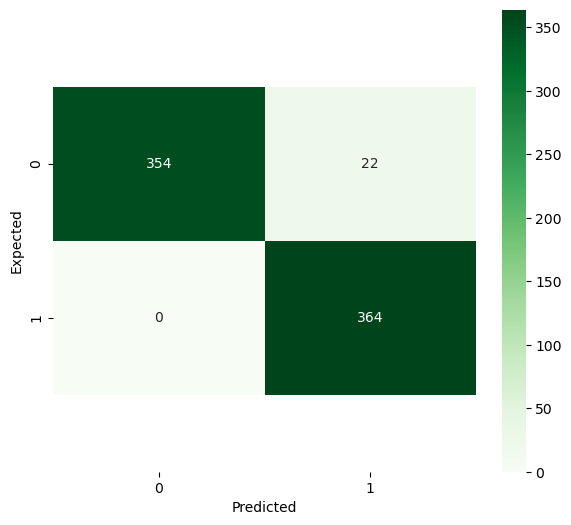

In [139]:
fig=plt.figure(figsize=(15,6))
ax1=fig.add_subplot(1,2,1)
ax1=sns.heatmap(pd.DataFrame(cm), annot=True,cmap='Greens', fmt='d')
bottom,top=ax1.get_ylim()
ax1.set_ylim(bottom+0.5,top-0.5)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

Accuracy:

In [140]:
from sklearn.metrics import accuracy_score
model_accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy of the model= {model_accuracy*100}%')

Accuracy of the model= 97.02702702702702%


Precision:

In [141]:
from sklearn.metrics import precision_score

model_precision=precision_score(y_test,y_pred)
print(f'Precision score of the model= {model_precision*100}%')

Precision score of the model= 94.30051813471503%


Recall:

In [142]:
from sklearn.metrics import recall_score

model_recall=recall_score(y_test,y_pred)
print(f'Recall score of the model= {model_recall*100}%')

Recall score of the model= 100.0%


F1-Score:

In [143]:
from sklearn.metrics import f1_score

f1score=f1_score(y_test,y_pred)
print(f'F1-Score of the model= {f1score*100}%')

F1-Score of the model= 97.06666666666666%


# Classification Report:

In [144]:
from sklearn.metrics import classification_report
print( classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       376
           1       0.94      1.00      0.97       364

    accuracy                           0.97       740
   macro avg       0.97      0.97      0.97       740
weighted avg       0.97      0.97      0.97       740



# Model Interpretation

In [145]:
#Feature Importance Matrix in Random Forest/ Feature Extraction
score_list=rf.feature_importances_
list_of_features=list(X.columns)
score_df=pd.DataFrame({'Feature':list_of_features,'Score':score_list})
score_df.sort_values(by='Score',ascending=False)

,Feature,Score
15,MonthlyIncome,0.079238
2,DailyRate,0.056846
18,OverTime,0.056247
0,Age,0.053701
9,HourlyRate,0.050604
26,YearsAtCompany,0.048807
16,MonthlyRate,0.047644
22,StockOptionLevel,0.045069
19,PercentSalaryHike,0.044293
23,TotalWorkingYears,0.039733


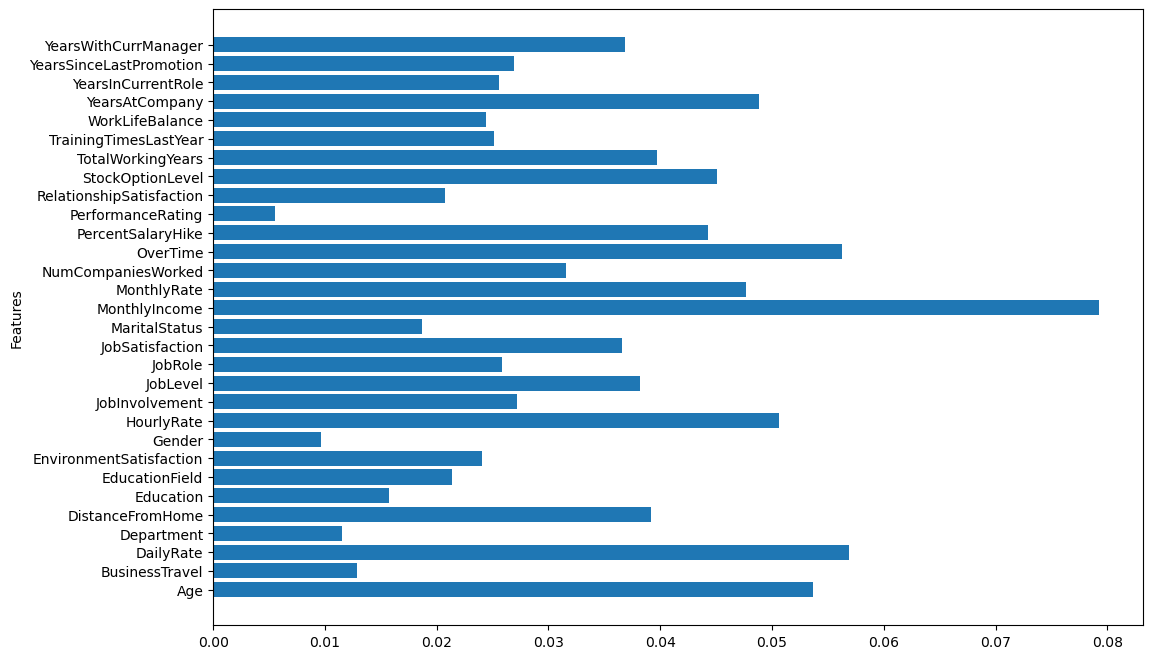

In [146]:
list_of_features=list(X.columns)
plt.figure(figsize=(12,8))
plt.barh(range(len(list_of_features)),rf.feature_importances_)
plt.yticks(np.arange(len(list_of_features)),list_of_features)
plt.ylabel('Features')
plt.show()

# Conclusion

Upon the model building and training the predictive model,i have achieved an impressive testing accuracy of 97% .The high accuracy suggests that the model performs well in classifying or predicting the outcomes on the test dataset.


I have identified important features for predicting employee attrition :-

1.Monthly Income:-Employees with higher monthly incomes might be less likely to leave the company.Higher income can contribute to job satisfaction and reduced finacial stress,which are the factor that may deter attrition.

2.Daily Rate:-Daily rate of pay can influence attrition.Higher daily rates might make employees more likely to stay.


3.Over Time:-This is an important feature suggests that employees who work excessive overtime hours may be more prone to attrition.


4.Age:- It is an significant factor.Younger employees may be more inclined to explore new opportunities or industries ,leading to higher attrition.Other hand we can say that old employees may have stronger ties to the company and less likely to leave.

5.Hourly Rate:-A higher hourly rate could be linked to lower attrition,as it implies better compensation,which may improve job satisfaction and reduce of seeking other employment.


6.Years at Company:Employees who have been with the company for a significant duration are less likely to leave.


 To improve employee rentention and jobsatisfaction based on the important feaures identified from the datasets are above mentioned.Based on these features i can recommend specfic actionable insights to HR Team.


Recommendations:


1.Conduct a salary analysis to ensure that the organization's compensation packages are competitive within the industry and region.Consider the annual or periodic salary adjustment to reflect market conditions and provide opportunities for performance-based salary increases.


2.Regularly assess and adjust daily rates or hourly wages to ensure they align with industry standards.Consider perfomance-based bonuses or incentives to reward high performing employees.


3.Implement policies to manage and reduce excessive overtime.


4.Create a multi-generational workplace that values the contributions of employees of all age groups.Implement mentorship programs to facilitate knowledge transfer between generations.Consider offering flexible retirement plans.


5.Regularly measure and assess job satisfaction through employee surveys and feedback.
